In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-29 19:54:27.406886


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1171.5708)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.5551)tensor(7.3587)tensor(5.1007)tensor(6.2414)tensor(4.8904)tensor(2.8925)tensor(4.4701)tensor(4.1037)tensor(6.5286)tensor(4.6591)tensor(4.3405)tensor(3.8424)tensor(9.4393)tensor(4.5292)tensor(5.5882)tensor(4.0295)tensor(6.3990)tensor(2.9444)tensor(6.1813)tensor(3.4591)tensor(3.4435)tensor(4.5114)tensor(8.3005)tensor(5.4922)tensor(5.1433)tensor(5.4709)tensor(6.5018)tensor(8.9497)tensor(3.9941)tensor(4.3565)tensor(5.9241)tensor(4.7804)tensor(3.6365)tensor(4.7080)tensor(8.0531)tensor(3.7576)tensor(6.6630)tensor(2.4981)tensor(4.5347)tensor(4.8187)tensor(3.8487)tensor(2.8303)tensor(3.2356)tensor(3.9831)tensor(3.3124)tensor(3.8845)tensor(6.3221)tensor(3.5978)tensor(5.7582)tensor(3.4766)tensor(4.8072)tensor(4.7992)tensor(2.6046)tensor(4.5801)tensor(6.9730)tensor(3.2442)tensor(4.5405)tensor(2.8318)tensor(8.8840)tensor(5.4158)tensor(7.0567)tensor(4.4412)tensor(3.1098)tensor(7.6374)tensor(4.0861)tensor(9.2423)tensor(6.2062)tensor(6.0323)tensor(3.6861)tensor(6.2504)tensor(6.2407)tensor

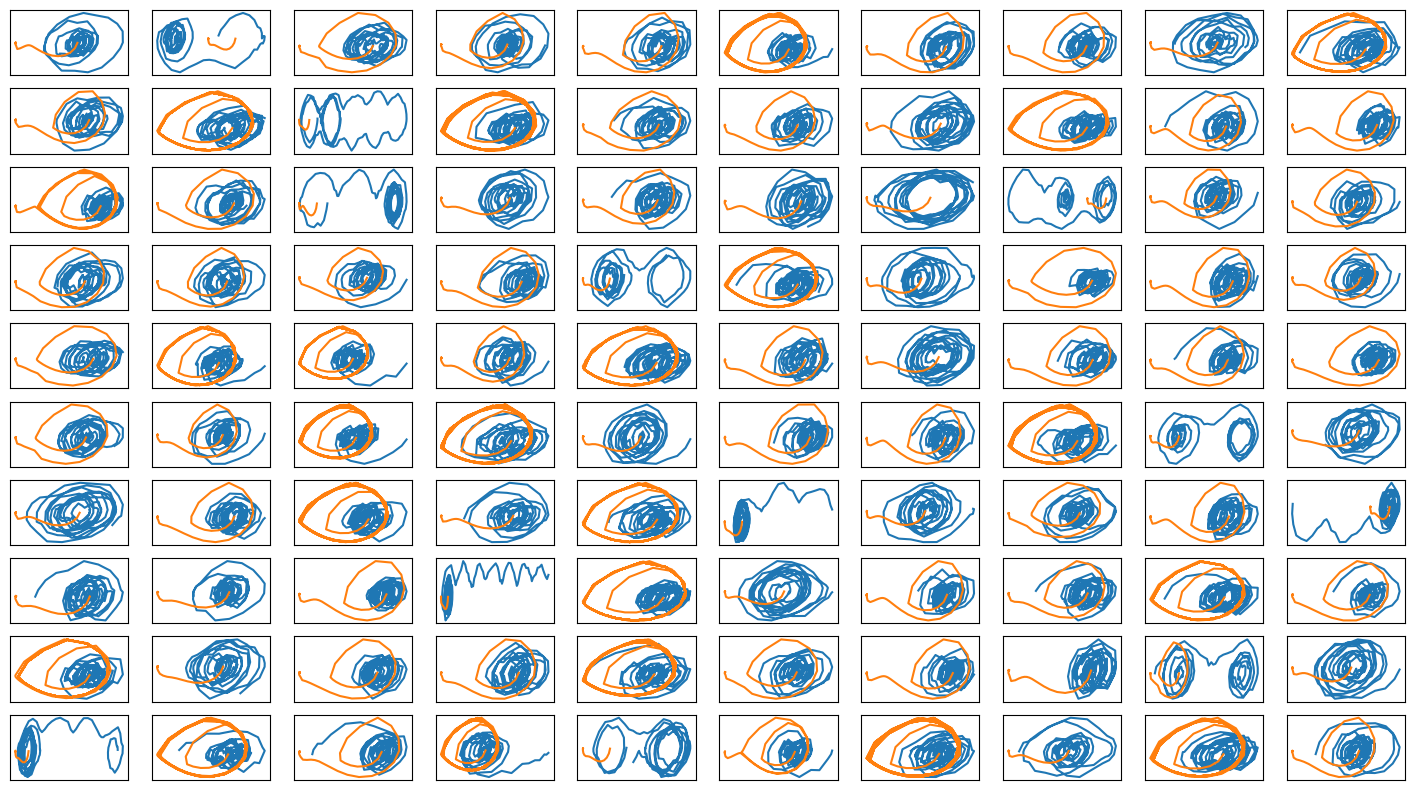

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 479.45333  validloss 575.58260±0.00000  bestvalidloss 575.58260  last_update 0
train: iter 1  trainloss 327.71709  validloss 383.81669±0.00000  bestvalidloss 383.81669  last_update 0
train: iter 2  trainloss 179.94388  validloss 211.08942±0.00000  bestvalidloss 211.08942  last_update 0
train: iter 3  trainloss 852.53214  validloss 400.68869±0.00000  bestvalidloss 211.08942  last_update 1
train: iter 4  trainloss 82.20995  validloss 109.84360±0.00000  bestvalidloss 109.84360  last_update 0
train: iter 5  trainloss 100.43233  validloss 23.87380±0.00000  bestvalidloss 23.87380  last_update 0
train: iter 6  trainloss 24.38554  validloss 58.20971±0.00000  bestvalidloss 23.87380  last_update 1
train: iter 7  trainloss -12.10404  validloss -14.52265±0.00000  bestvalidloss -14.52265  last_update 0
train: iter 8  trainloss -37.47116  validloss -38.50874±0.00000  bestvalidloss -38.50874  last_update 0
train: iter 9  trainloss -59.68032  validloss -66.1

train: iter 77  trainloss -565.82013  validloss -598.18949±0.00000  bestvalidloss -627.12525  last_update 5
train: iter 78  trainloss -562.69616  validloss -585.22000±0.00000  bestvalidloss -627.12525  last_update 6
train: iter 79  trainloss -569.99544  validloss -623.85301±0.00000  bestvalidloss -627.12525  last_update 7
train: iter 80  trainloss -565.27296  validloss -632.76026±0.00000  bestvalidloss -632.76026  last_update 0
train: iter 81  trainloss -570.58358  validloss -615.39174±0.00000  bestvalidloss -632.76026  last_update 1
train: iter 82  trainloss -579.59731  validloss -631.15521±0.00000  bestvalidloss -632.76026  last_update 2
train: iter 83  trainloss -577.10660  validloss -586.01313±0.00000  bestvalidloss -632.76026  last_update 3
train: iter 84  trainloss -585.81043  validloss -648.71243±0.00000  bestvalidloss -648.71243  last_update 0
train: iter 85  trainloss -601.25023  validloss -643.91067±0.00000  bestvalidloss -648.71243  last_update 1
train: iter 86  trainloss -6

train: iter 153  trainloss -659.29288  validloss -745.22614±0.00000  bestvalidloss -745.22614  last_update 0
train: iter 154  trainloss -657.84704  validloss -687.95483±0.00000  bestvalidloss -745.22614  last_update 1
train: iter 155  trainloss -674.70436  validloss -734.89531±0.00000  bestvalidloss -745.22614  last_update 2
train: iter 156  trainloss -657.22489  validloss -739.11550±0.00000  bestvalidloss -745.22614  last_update 3
train: iter 157  trainloss -687.17835  validloss -736.70659±0.00000  bestvalidloss -745.22614  last_update 4
train: iter 158  trainloss -694.41867  validloss -734.62447±0.00000  bestvalidloss -745.22614  last_update 5
train: iter 159  trainloss -681.39918  validloss -732.54642±0.00000  bestvalidloss -745.22614  last_update 6
train: iter 160  trainloss -686.13198  validloss -726.72707±0.00000  bestvalidloss -745.22614  last_update 7
train: iter 161  trainloss -685.73895  validloss -730.67728±0.00000  bestvalidloss -745.22614  last_update 8
train: iter 162  tr

train: iter 229  trainloss -659.28806  validloss -769.71541±0.00000  bestvalidloss -777.72932  last_update 15
train: iter 230  trainloss -695.48766  validloss -705.84235±0.00000  bestvalidloss -777.72932  last_update 16
train: iter 231  trainloss -682.67415  validloss -760.19887±0.00000  bestvalidloss -777.72932  last_update 17
train: iter 232  trainloss -707.26970  validloss -742.63930±0.00000  bestvalidloss -777.72932  last_update 18
train: iter 233  trainloss -692.05949  validloss -727.30177±0.00000  bestvalidloss -777.72932  last_update 19
train: iter 234  trainloss -692.21816  validloss -718.52612±0.00000  bestvalidloss -777.72932  last_update 20
train: iter 235  trainloss -695.37400  validloss -717.87175±0.00000  bestvalidloss -777.72932  last_update 21
train: iter 236  trainloss -714.48997  validloss -746.33869±0.00000  bestvalidloss -777.72932  last_update 22
train: iter 237  trainloss -709.76735  validloss -735.42395±0.00000  bestvalidloss -777.72932  last_update 23
train: ite

train: iter 304  trainloss -749.04074  validloss -759.47927±0.00000  bestvalidloss -785.89280  last_update 40
train: iter 305  trainloss -727.39752  validloss -745.87249±0.00000  bestvalidloss -785.89280  last_update 41
train: iter 306  trainloss -744.88105  validloss -768.35305±0.00000  bestvalidloss -785.89280  last_update 42
train: iter 307  trainloss -734.42305  validloss -761.32121±0.00000  bestvalidloss -785.89280  last_update 43
train: iter 308  trainloss -739.46498  validloss -775.80963±0.00000  bestvalidloss -785.89280  last_update 44
train: iter 309  trainloss -729.87800  validloss -772.86859±0.00000  bestvalidloss -785.89280  last_update 45
train: iter 310  trainloss -737.44763  validloss -755.05053±0.00000  bestvalidloss -785.89280  last_update 46
train: iter 311  trainloss -725.02977  validloss -745.07395±0.00000  bestvalidloss -785.89280  last_update 47
train: iter 312  trainloss -735.16210  validloss -737.22302±0.00000  bestvalidloss -785.89280  last_update 48
train: ite

train: iter 379  trainloss -757.95116  validloss -772.83652±0.00000  bestvalidloss -791.97101  last_update 23
train: iter 380  trainloss -753.86009  validloss -779.90187±0.00000  bestvalidloss -791.97101  last_update 24
train: iter 381  trainloss -737.47318  validloss -799.99893±0.00000  bestvalidloss -799.99893  last_update 0
train: iter 382  trainloss -751.69604  validloss -780.08945±0.00000  bestvalidloss -799.99893  last_update 1
train: iter 383  trainloss -749.16577  validloss -791.17615±0.00000  bestvalidloss -799.99893  last_update 2
train: iter 384  trainloss -752.66029  validloss -734.21168±0.00000  bestvalidloss -799.99893  last_update 3
train: iter 385  trainloss -742.74382  validloss -777.98508±0.00000  bestvalidloss -799.99893  last_update 4
train: iter 386  trainloss -716.79778  validloss -775.08825±0.00000  bestvalidloss -799.99893  last_update 5
train: iter 387  trainloss -733.31044  validloss -652.53198±0.00000  bestvalidloss -799.99893  last_update 6
train: iter 388  

train: iter 454  trainloss -769.87947  validloss -768.12685±0.00000  bestvalidloss -814.16069  last_update 25
train: iter 455  trainloss -762.19280  validloss -769.33489±0.00000  bestvalidloss -814.16069  last_update 26
train: iter 456  trainloss -769.45677  validloss -785.45684±0.00000  bestvalidloss -814.16069  last_update 27
train: iter 457  trainloss -766.59500  validloss -799.02252±0.00000  bestvalidloss -814.16069  last_update 28
train: iter 458  trainloss -768.70224  validloss -778.42633±0.00000  bestvalidloss -814.16069  last_update 29
train: iter 459  trainloss -762.95318  validloss -805.57196±0.00000  bestvalidloss -814.16069  last_update 30
train: iter 460  trainloss -763.65410  validloss -799.10060±0.00000  bestvalidloss -814.16069  last_update 31
train: iter 461  trainloss -761.00594  validloss -787.14562±0.00000  bestvalidloss -814.16069  last_update 32
train: iter 462  trainloss -765.20715  validloss -784.83313±0.00000  bestvalidloss -814.16069  last_update 33
train: ite

train: iter 529  trainloss -775.58601  validloss -786.20661±0.00000  bestvalidloss -836.14910  last_update 6
train: iter 530  trainloss -794.73261  validloss -792.89823±0.00000  bestvalidloss -836.14910  last_update 7
train: iter 531  trainloss -745.92997  validloss -820.68943±0.00000  bestvalidloss -836.14910  last_update 8
train: iter 532  trainloss -806.08337  validloss -796.92974±0.00000  bestvalidloss -836.14910  last_update 9
train: iter 533  trainloss -778.01368  validloss -838.20432±0.00000  bestvalidloss -838.20432  last_update 0
train: iter 534  trainloss -792.34984  validloss -818.47827±0.00000  bestvalidloss -838.20432  last_update 1
train: iter 535  trainloss -774.12177  validloss -840.47188±0.00000  bestvalidloss -840.47188  last_update 0
train: iter 536  trainloss -774.90406  validloss -769.56705±0.00000  bestvalidloss -840.47188  last_update 1
train: iter 537  trainloss -800.54932  validloss -833.26283±0.00000  bestvalidloss -840.47188  last_update 2
train: iter 538  tr

train: iter 605  trainloss -824.80503  validloss -851.33137±0.00000  bestvalidloss -863.30295  last_update 17
train: iter 606  trainloss -831.32799  validloss -858.61090±0.00000  bestvalidloss -863.30295  last_update 18
train: iter 607  trainloss -812.20472  validloss -662.14716±0.00000  bestvalidloss -863.30295  last_update 19
train: iter 608  trainloss -831.53735  validloss -809.58479±0.00000  bestvalidloss -863.30295  last_update 20
train: iter 609  trainloss -857.65164  validloss -861.07761±0.00000  bestvalidloss -863.30295  last_update 21
train: iter 610  trainloss -821.22316  validloss -853.43874±0.00000  bestvalidloss -863.30295  last_update 22
train: iter 611  trainloss -851.70582  validloss -854.26743±0.00000  bestvalidloss -863.30295  last_update 23
train: iter 612  trainloss -813.11646  validloss -870.37716±0.00000  bestvalidloss -870.37716  last_update 0
train: iter 613  trainloss -845.67155  validloss -816.17705±0.00000  bestvalidloss -870.37716  last_update 1
train: iter 

train: iter 681  trainloss -883.31139  validloss -840.34310±0.00000  bestvalidloss -893.41706  last_update 10
train: iter 682  trainloss -824.47162  validloss -859.19118±0.00000  bestvalidloss -893.41706  last_update 11
train: iter 683  trainloss -858.32922  validloss -787.50510±0.00000  bestvalidloss -893.41706  last_update 12
train: iter 684  trainloss -867.17072  validloss -887.12235±0.00000  bestvalidloss -893.41706  last_update 13
train: iter 685  trainloss -857.25100  validloss -878.10979±0.00000  bestvalidloss -893.41706  last_update 14
train: iter 686  trainloss -879.42093  validloss -883.07892±0.00000  bestvalidloss -893.41706  last_update 15
train: iter 687  trainloss -862.21822  validloss -888.13178±0.00000  bestvalidloss -893.41706  last_update 16
train: iter 688  trainloss -867.76253  validloss -848.46720±0.00000  bestvalidloss -893.41706  last_update 17
train: iter 689  trainloss -846.83773  validloss -834.99921±0.00000  bestvalidloss -893.41706  last_update 18
train: ite

train: iter 756  trainloss -888.85917  validloss -893.04334±0.00000  bestvalidloss -906.64275  last_update 65
train: iter 757  trainloss -898.41828  validloss -895.62140±0.00000  bestvalidloss -906.64275  last_update 66
train: iter 758  trainloss -883.25300  validloss -898.87278±0.00000  bestvalidloss -906.64275  last_update 67
train: iter 759  trainloss -865.04226  validloss -821.32544±0.00000  bestvalidloss -906.64275  last_update 68
train: iter 760  trainloss -882.00168  validloss -882.47988±0.00000  bestvalidloss -906.64275  last_update 69
train: iter 761  trainloss -886.93707  validloss -876.10124±0.00000  bestvalidloss -906.64275  last_update 70
train: iter 762  trainloss -878.34936  validloss -892.09092±0.00000  bestvalidloss -906.64275  last_update 71
train: iter 763  trainloss -882.11763  validloss -866.99393±0.00000  bestvalidloss -906.64275  last_update 72
train: iter 764  trainloss -885.16303  validloss -881.66023±0.00000  bestvalidloss -906.64275  last_update 73
train: ite

train: iter 832  trainloss -902.73382  validloss -905.12767±0.00000  bestvalidloss -928.95061  last_update 8
train: iter 833  trainloss -892.80792  validloss -903.00503±0.00000  bestvalidloss -928.95061  last_update 9
train: iter 834  trainloss -870.13177  validloss -818.30516±0.00000  bestvalidloss -928.95061  last_update 10
train: iter 835  trainloss -895.82483  validloss -879.52786±0.00000  bestvalidloss -928.95061  last_update 11
train: iter 836  trainloss -882.09776  validloss -855.06950±0.00000  bestvalidloss -928.95061  last_update 12
train: iter 837  trainloss -905.29014  validloss -883.66236±0.00000  bestvalidloss -928.95061  last_update 13
train: iter 838  trainloss -879.30750  validloss -855.31230±0.00000  bestvalidloss -928.95061  last_update 14
train: iter 839  trainloss -882.46211  validloss -911.87078±0.00000  bestvalidloss -928.95061  last_update 15
train: iter 840  trainloss -886.27649  validloss -867.51457±0.00000  bestvalidloss -928.95061  last_update 16
train: iter 

train: iter 908  trainloss -902.19811  validloss -882.66418±0.00000  bestvalidloss -936.03729  last_update 7
train: iter 909  trainloss -898.38400  validloss -913.73549±0.00000  bestvalidloss -936.03729  last_update 8
train: iter 910  trainloss -905.57897  validloss -908.65928±0.00000  bestvalidloss -936.03729  last_update 9
train: iter 911  trainloss -913.06675  validloss -908.33171±0.00000  bestvalidloss -936.03729  last_update 10
train: iter 912  trainloss -892.93553  validloss -904.21767±0.00000  bestvalidloss -936.03729  last_update 11
train: iter 913  trainloss -897.64510  validloss -899.15377±0.00000  bestvalidloss -936.03729  last_update 12
train: iter 914  trainloss -865.45717  validloss -865.53100±0.00000  bestvalidloss -936.03729  last_update 13
train: iter 915  trainloss -899.92712  validloss -811.29463±0.00000  bestvalidloss -936.03729  last_update 14
train: iter 916  trainloss -916.55602  validloss -925.33195±0.00000  bestvalidloss -936.03729  last_update 15
train: iter 9

train: iter 984  trainloss -882.10805  validloss -651.99191±0.00000  bestvalidloss -947.16740  last_update 3
train: iter 985  trainloss -906.30817  validloss -896.86077±0.00000  bestvalidloss -947.16740  last_update 4
train: iter 986  trainloss -908.66423  validloss -840.24395±0.00000  bestvalidloss -947.16740  last_update 5
train: iter 987  trainloss -925.11575  validloss -903.36288±0.00000  bestvalidloss -947.16740  last_update 6
train: iter 988  trainloss -876.00541  validloss -932.81781±0.00000  bestvalidloss -947.16740  last_update 7
train: iter 989  trainloss -919.16224  validloss -895.39537±0.00000  bestvalidloss -947.16740  last_update 8
train: iter 990  trainloss -871.10972  validloss -916.60702±0.00000  bestvalidloss -947.16740  last_update 9
train: iter 991  trainloss -932.20631  validloss -917.85058±0.00000  bestvalidloss -947.16740  last_update 10
train: iter 992  trainloss -931.21266  validloss -939.28385±0.00000  bestvalidloss -947.16740  last_update 11
train: iter 993  

train: iter 1059  trainloss -930.95884  validloss -900.61013±0.00000  bestvalidloss -952.47299  last_update 63
train: iter 1060  trainloss -929.26227  validloss -903.29938±0.00000  bestvalidloss -952.47299  last_update 64
train: iter 1061  trainloss -918.26787  validloss -739.13651±0.00000  bestvalidloss -952.47299  last_update 65
train: iter 1062  trainloss -896.30194  validloss -876.76654±0.00000  bestvalidloss -952.47299  last_update 66
train: iter 1063  trainloss -900.21649  validloss -809.72277±0.00000  bestvalidloss -952.47299  last_update 67
train: iter 1064  trainloss -922.41432  validloss -882.78865±0.00000  bestvalidloss -952.47299  last_update 68
train: iter 1065  trainloss -892.22427  validloss -946.47787±0.00000  bestvalidloss -952.47299  last_update 69
train: iter 1066  trainloss -919.96385  validloss -834.85771±0.00000  bestvalidloss -952.47299  last_update 70
train: iter 1067  trainloss -926.08849  validloss -884.98769±0.00000  bestvalidloss -952.47299  last_update 71
t

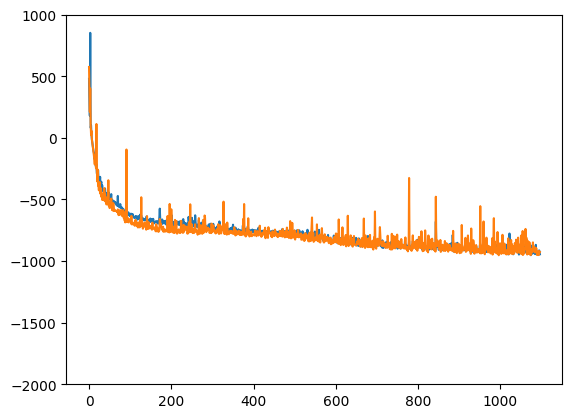

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


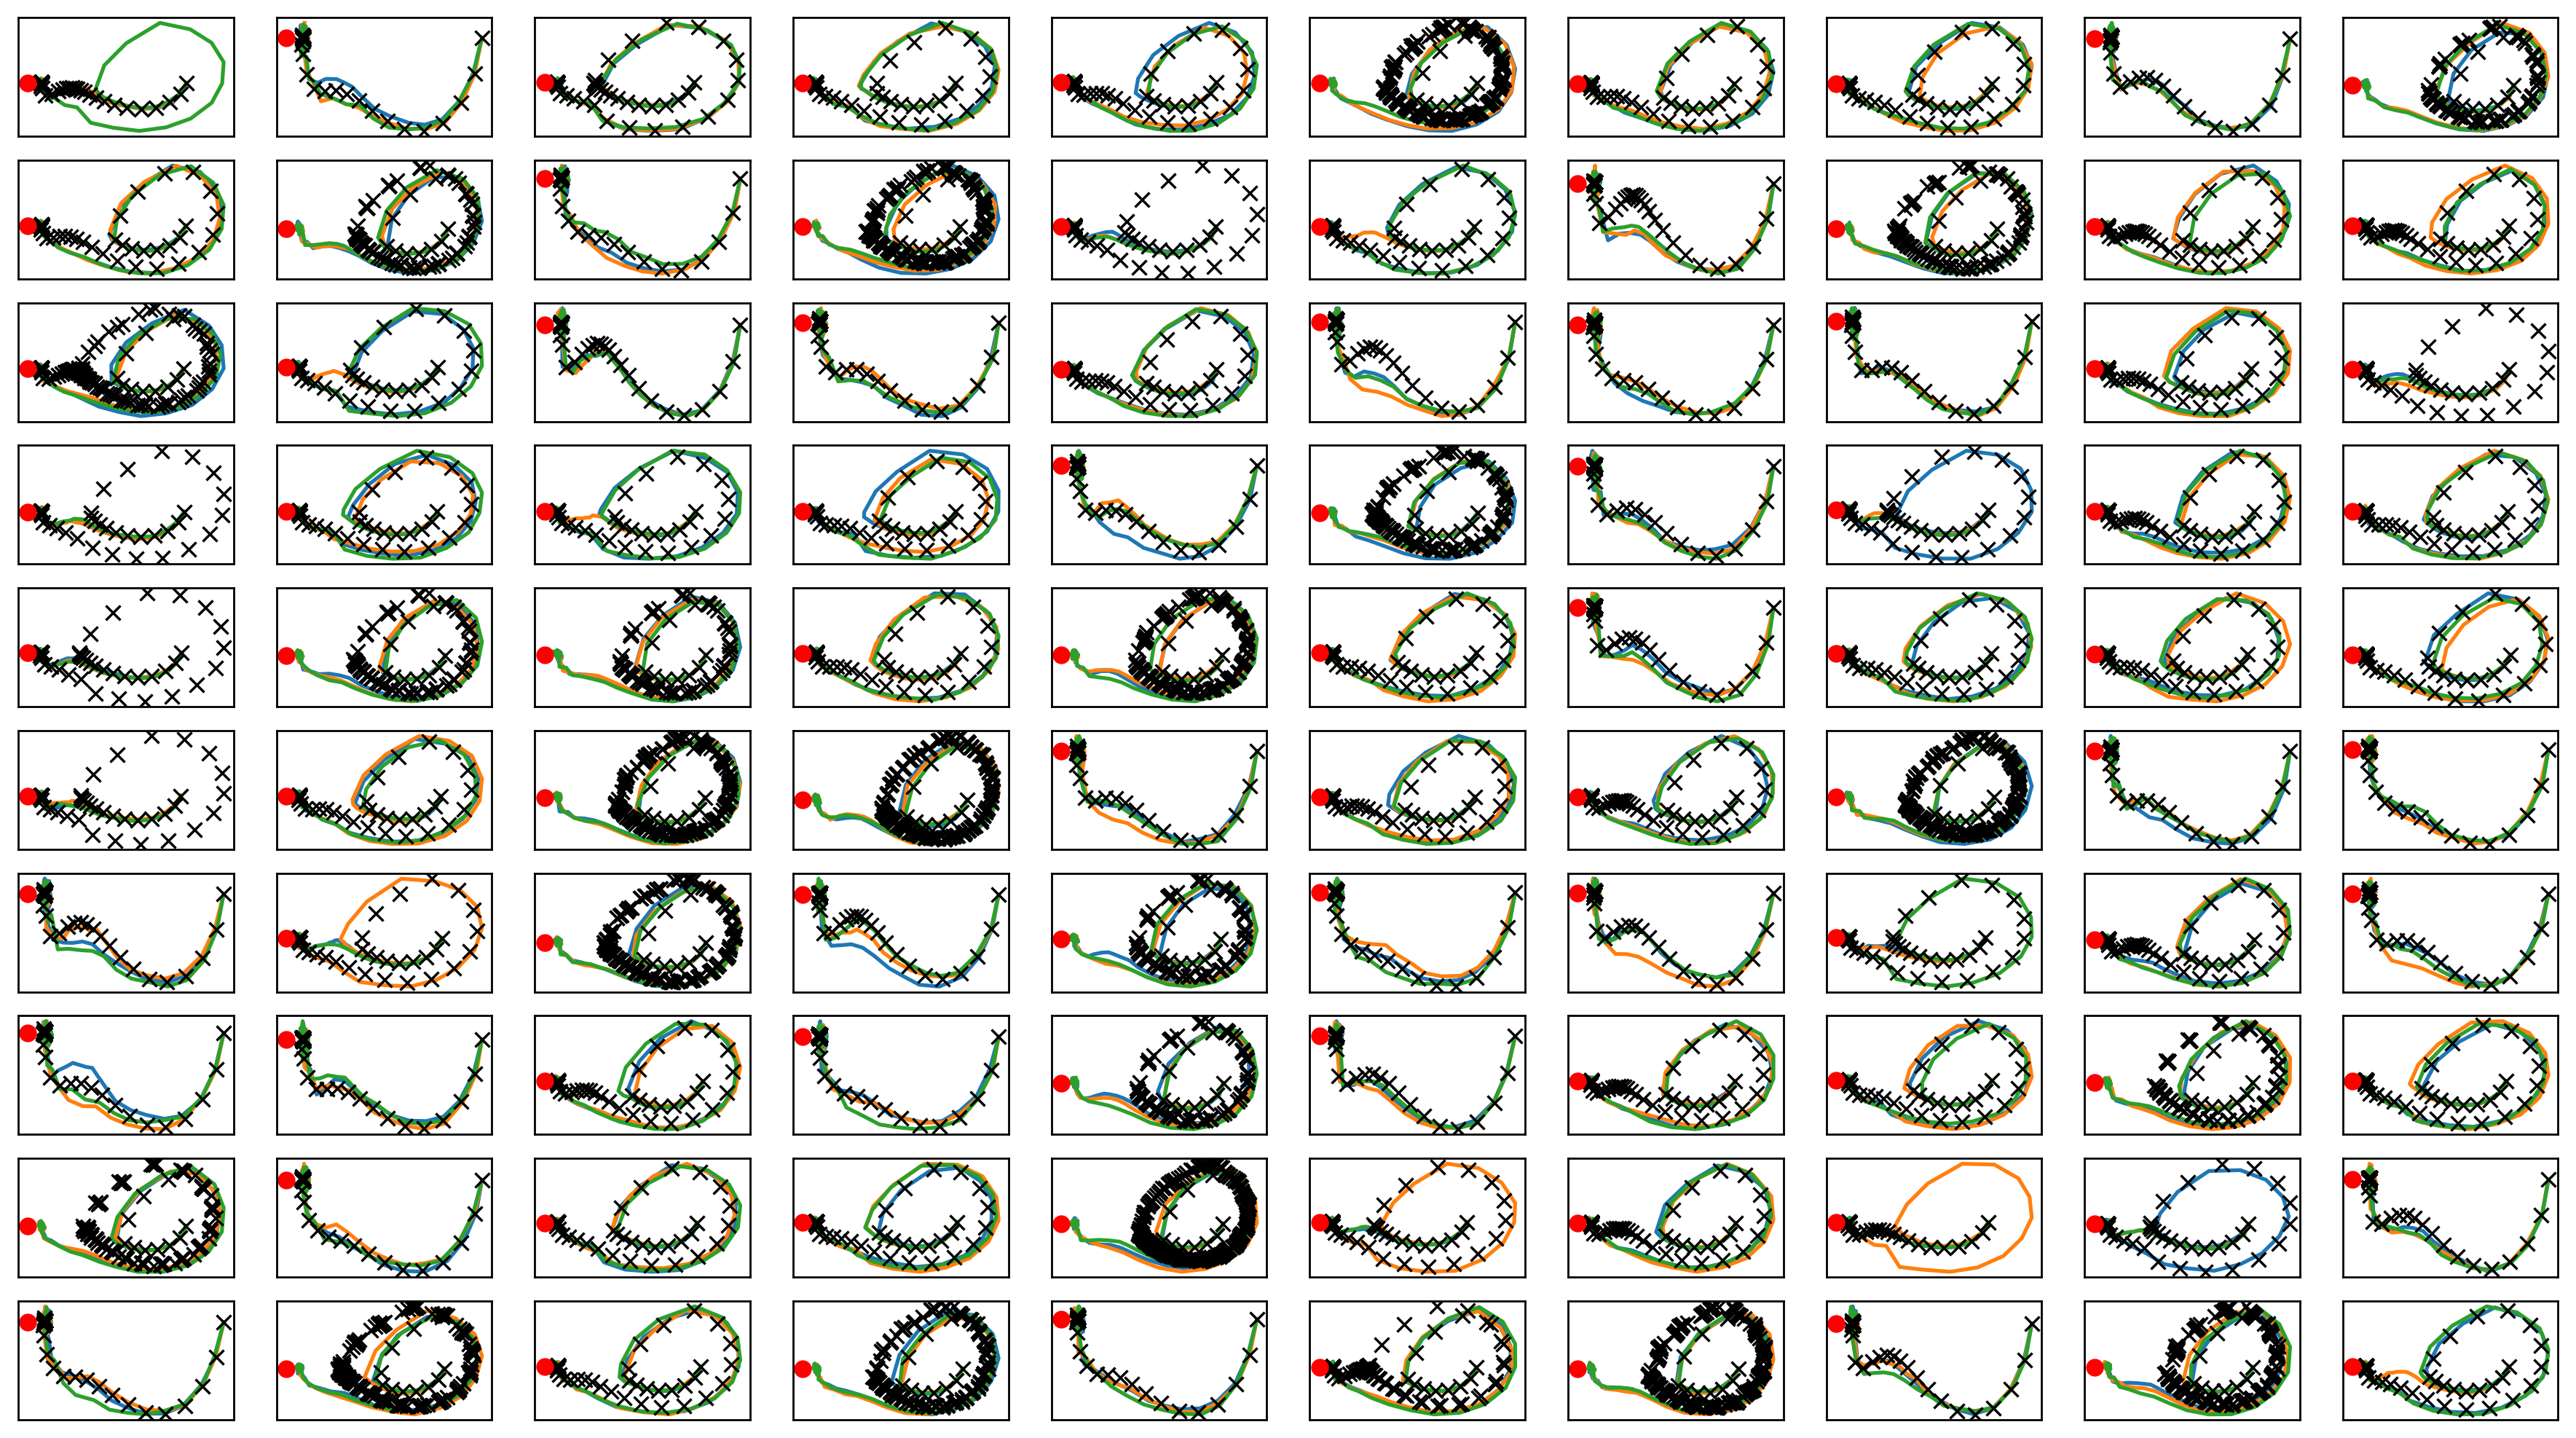

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

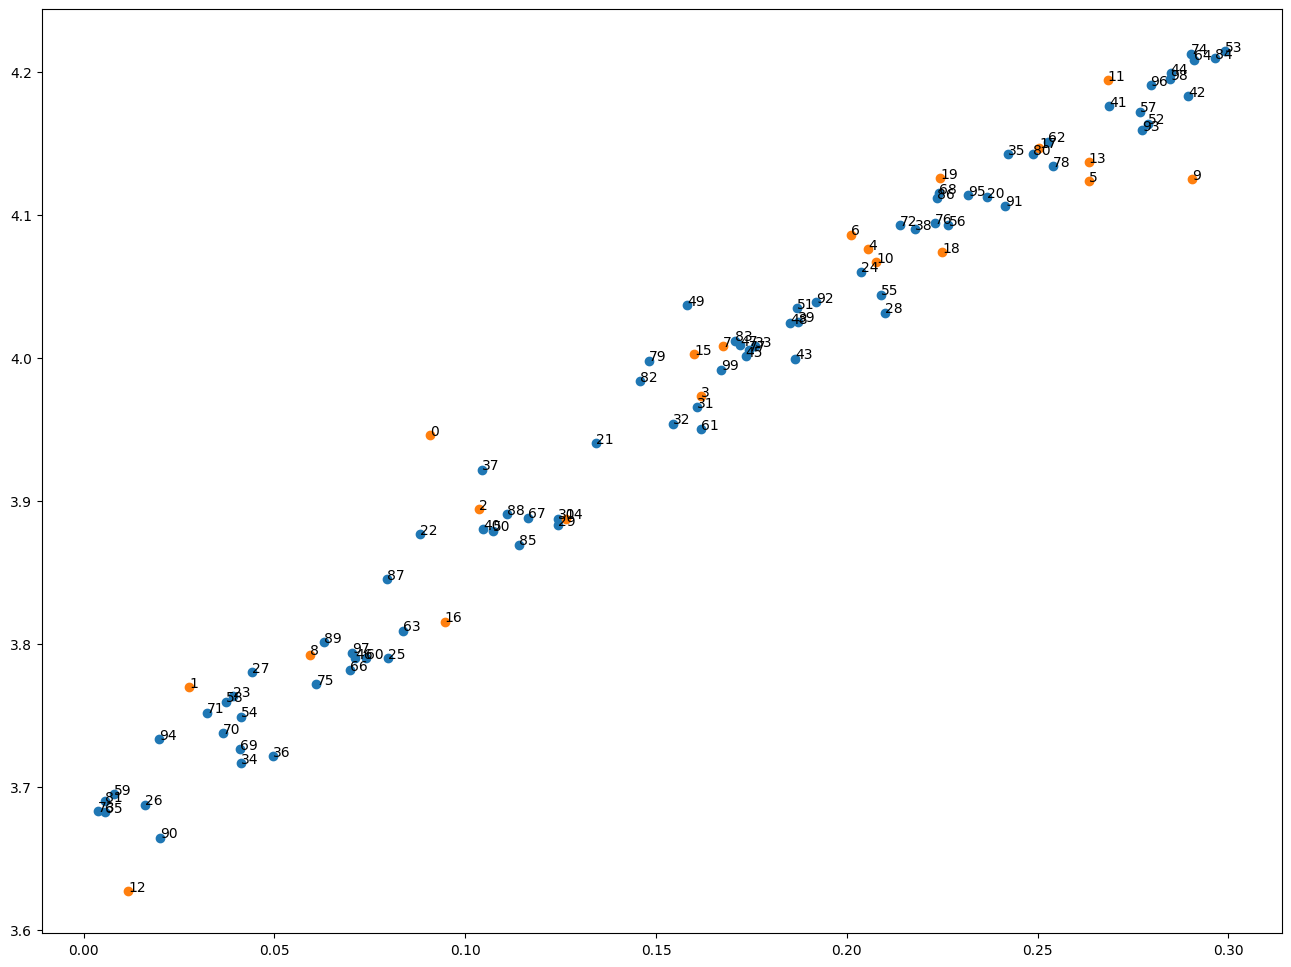

[0.09069977 0.02770158 0.10366822 0.16164502 0.20556585 0.26343523
 0.20114025 0.16760695 0.05943045 0.29047847 0.20769678 0.268382
 0.01171643 0.26344275 0.12633229 0.15994959 0.09465469 0.2503877
 0.22504329 0.2244497  0.2367838  0.13436806 0.08808424 0.03900857
 0.20365066 0.079664   0.01600876 0.04401857 0.20992751 0.1242168
 0.12425378 0.16076892 0.15446673 0.17596651 0.04124241 0.24221739
 0.04960626 0.10432976 0.2177994  0.18710166 0.1046695  0.26876587
 0.28945201 0.18650872 0.28484678 0.17351688 0.07110809 0.17210385
 0.18514347 0.15811743 0.10718093 0.18700803 0.27883117 0.29919686
 0.04114072 0.20904545 0.22663892 0.27690736 0.03728129 0.0078633
 0.07386332 0.16164932 0.25260927 0.0837551  0.29087872 0.00559419
 0.06989228 0.11635819 0.22413649 0.04093657 0.03640304 0.03224824
 0.21389669 0.00376679 0.2901829  0.06098797 0.22314776 0.17440768
 0.25404864 0.14813091 0.24869427 0.00557286 0.14590353 0.17065543
 0.29658485 0.11404235 0.22360033 0.07947587 0.11102526 0.0630522
 

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


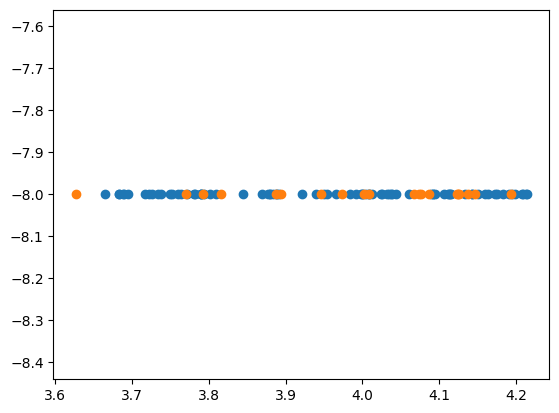

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.34786  validloss 8.91695±0.00000  bestvalidloss 8.91695  last_update 0
train: iter 1  trainloss 7.56653  validloss 8.04023±0.00000  bestvalidloss 8.04023  last_update 0
train: iter 2  trainloss 6.91184  validloss 7.31820±0.00000  bestvalidloss 7.31820  last_update 0
train: iter 3  trainloss 6.36596  validloss 6.74177±0.00000  bestvalidloss 6.74177  last_update 0
train: iter 4  trainloss 5.89227  validloss 6.23756±0.00000  bestvalidloss 6.23756  last_update 0
train: iter 5  trainloss 5.47435  validloss 5.73038±0.00000  bestvalidloss 5.73038  last_update 0
train: iter 6  trainloss 5.11787  validloss 5.36837±0.00000  bestvalidloss 5.36837  last_update 0
train: iter 7  trainloss 4.80411  validloss 5.04444±0.00000  bestvalidloss 5.04444  last_update 0
train: iter 8  trainloss 4.53537  validloss 4.73253±0.00000  bestvalidloss 4.73253  last_update 0
train: iter 9  trainloss 4.28970  validloss 4.46154±0.00000  bestvalidloss 4.46154  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.41881  validloss 0.43009±0.00000  bestvalidloss 0.43009  last_update 0
train: iter 88  trainloss 0.38211  validloss 0.39399±0.00000  bestvalidloss 0.39399  last_update 0
train: iter 89  trainloss 0.34883  validloss 0.35541±0.00000  bestvalidloss 0.35541  last_update 0
train: iter 90  trainloss 0.31065  validloss 0.31852±0.00000  bestvalidloss 0.31852  last_update 0
train: iter 91  trainloss 0.27815  validloss 0.28729±0.00000  bestvalidloss 0.28729  last_update 0
train: iter 92  trainloss 0.24450  validloss 0.24834±0.00000  bestvalidloss 0.24834  last_update 0
train: iter 93  trainloss 0.21353  validloss 0.21143±0.00000  bestvalidloss 0.21143  last_update 0
train: iter 94  trainloss 0.17977  validloss 0.18034±0.00000  bestvalidloss 0.18034  last_update 0
train: iter 95  trainloss 0.14617  validloss 0.14949±0.00000  bestvalidloss 0.14949  last_update 0
train: iter 96  trainloss 0.11670  validloss 0.12091±0.00000  bestvalidloss 0.12091  last_update 0
train: ite

train: iter 170  trainloss -0.37367  validloss -0.47193±0.00000  bestvalidloss -0.47709  last_update 14
train: iter 171  trainloss -0.35917  validloss -0.44943±0.00000  bestvalidloss -0.47709  last_update 15
train: iter 172  trainloss -0.35019  validloss -0.44136±0.00000  bestvalidloss -0.47709  last_update 16
train: iter 173  trainloss -0.36081  validloss -0.44837±0.00000  bestvalidloss -0.47709  last_update 17
train: iter 174  trainloss -0.35841  validloss -0.46562±0.00000  bestvalidloss -0.47709  last_update 18
train: iter 175  trainloss -0.39817  validloss -0.42954±0.00000  bestvalidloss -0.47709  last_update 19
train: iter 176  trainloss -0.36446  validloss -0.44889±0.00000  bestvalidloss -0.47709  last_update 20
train: iter 177  trainloss -0.36148  validloss -0.40501±0.00000  bestvalidloss -0.47709  last_update 21
train: iter 178  trainloss -0.37327  validloss -0.44400±0.00000  bestvalidloss -0.47709  last_update 22
train: iter 179  trainloss -0.35125  validloss -0.46859±0.00000 

train: iter 260  trainloss -0.35792  validloss -0.45339±0.00000  bestvalidloss -0.47947  last_update 25
train: iter 261  trainloss -0.39061  validloss -0.42803±0.00000  bestvalidloss -0.47947  last_update 26
train: iter 262  trainloss -0.33817  validloss -0.45911±0.00000  bestvalidloss -0.47947  last_update 27
train: iter 263  trainloss -0.35185  validloss -0.45446±0.00000  bestvalidloss -0.47947  last_update 28
train: iter 264  trainloss -0.36220  validloss -0.41955±0.00000  bestvalidloss -0.47947  last_update 29
train: iter 265  trainloss -0.35551  validloss -0.44609±0.00000  bestvalidloss -0.47947  last_update 30
train: iter 266  trainloss -0.34506  validloss -0.43872±0.00000  bestvalidloss -0.47947  last_update 31
train: iter 267  trainloss -0.35497  validloss -0.48068±0.00000  bestvalidloss -0.48068  last_update 0
train: iter 268  trainloss -0.36723  validloss -0.43151±0.00000  bestvalidloss -0.48068  last_update 1
train: iter 269  trainloss -0.36422  validloss -0.44145±0.00000  b

train: iter 350  trainloss -0.35839  validloss -0.41797±0.00000  bestvalidloss -0.49334  last_update 9
train: iter 351  trainloss -0.35301  validloss -0.46218±0.00000  bestvalidloss -0.49334  last_update 10
train: iter 352  trainloss -0.33956  validloss -0.46679±0.00000  bestvalidloss -0.49334  last_update 11
train: iter 353  trainloss -0.36121  validloss -0.44398±0.00000  bestvalidloss -0.49334  last_update 12
train: iter 354  trainloss -0.37273  validloss -0.46147±0.00000  bestvalidloss -0.49334  last_update 13
train: iter 355  trainloss -0.35052  validloss -0.44682±0.00000  bestvalidloss -0.49334  last_update 14
train: iter 356  trainloss -0.34369  validloss -0.42648±0.00000  bestvalidloss -0.49334  last_update 15
train: iter 357  trainloss -0.35515  validloss -0.43163±0.00000  bestvalidloss -0.49334  last_update 16
train: iter 358  trainloss -0.37227  validloss -0.41067±0.00000  bestvalidloss -0.49334  last_update 17
train: iter 359  trainloss -0.35846  validloss -0.45764±0.00000  

train: iter 440  trainloss -0.35541  validloss -0.44876±0.00000  bestvalidloss -0.49334  last_update 99
train: iter 441  trainloss -0.34521  validloss -0.45413±0.00000  bestvalidloss -0.49334  last_update 100
train: fin


In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 3.9585, -3.5526], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 18.27569  validloss 24.13542±0.00000  bestvalidloss 24.13542  last_update 0
train: iter 1  trainloss 8.91763  validloss 12.69355±0.00000  bestvalidloss 12.69355  last_update 0
train: iter 2  trainloss 4.82981  validloss 6.31424±0.00000  bestvalidloss 6.31424  last_update 0
train: iter 3  trainloss 3.33335  validloss 4.06125±0.00000  bestvalidloss 4.06125  last_update 0
train: iter 4  trainloss 2.77787  validloss 3.11093±0.00000  bestvalidloss 3.11093  last_update 0
train: iter 5  trainloss 2.48589  validloss 2.77579±0.00000  bestvalidloss 2.77579  last_update 0
train: iter 6  trainloss 2.32912  validloss 2.51217±0.00000  bestvalidloss 2.51217  last_update 0
train: iter 7  trainloss 2.21459  validloss 2.46384±0.00000  bestvalidloss 2.46384  last_update 0
train: iter 8  trainloss 2.12631  validloss 2.30077±0.00000  bestvalidloss 2.30077  last_update 0
train: iter 9  trainloss 2.12797  validloss 2.34854±0.00000  bestvalidloss 2.30077  last_update 1
train: iter 10 

train: iter 83  trainloss 1.73434  validloss 1.41359±0.00000  bestvalidloss 1.33536  last_update 4
train: iter 84  trainloss 1.75694  validloss 1.35363±0.00000  bestvalidloss 1.33536  last_update 5
train: iter 85  trainloss 1.78384  validloss 1.36953±0.00000  bestvalidloss 1.33536  last_update 6
train: iter 86  trainloss 1.78301  validloss 1.42680±0.00000  bestvalidloss 1.33536  last_update 7
train: iter 87  trainloss 1.78086  validloss 1.41332±0.00000  bestvalidloss 1.33536  last_update 8
train: iter 88  trainloss 1.76186  validloss 1.54516±0.00000  bestvalidloss 1.33536  last_update 9
train: iter 89  trainloss 1.78771  validloss 1.44646±0.00000  bestvalidloss 1.33536  last_update 10
train: iter 90  trainloss 1.73914  validloss 1.53867±0.00000  bestvalidloss 1.33536  last_update 11
train: iter 91  trainloss 1.74870  validloss 1.46880±0.00000  bestvalidloss 1.33536  last_update 12
train: iter 92  trainloss 1.77718  validloss 1.37389±0.00000  bestvalidloss 1.33536  last_update 13
train:

train: iter 165  trainloss 1.68637  validloss 1.42317±0.00000  bestvalidloss 1.27416  last_update 47
train: iter 166  trainloss 1.64527  validloss 1.44671±0.00000  bestvalidloss 1.27416  last_update 48
train: iter 167  trainloss 1.63789  validloss 1.37937±0.00000  bestvalidloss 1.27416  last_update 49
train: iter 168  trainloss 1.66208  validloss 1.45816±0.00000  bestvalidloss 1.27416  last_update 50
train: iter 169  trainloss 1.69114  validloss 1.48779±0.00000  bestvalidloss 1.27416  last_update 51
train: iter 170  trainloss 1.68853  validloss 1.33322±0.00000  bestvalidloss 1.27416  last_update 52
train: iter 171  trainloss 1.70386  validloss 1.34469±0.00000  bestvalidloss 1.27416  last_update 53
train: iter 172  trainloss 1.62706  validloss 1.33144±0.00000  bestvalidloss 1.27416  last_update 54
train: iter 173  trainloss 1.66259  validloss 1.52321±0.00000  bestvalidloss 1.27416  last_update 55
train: iter 174  trainloss 1.63112  validloss 1.34846±0.00000  bestvalidloss 1.27416  last_

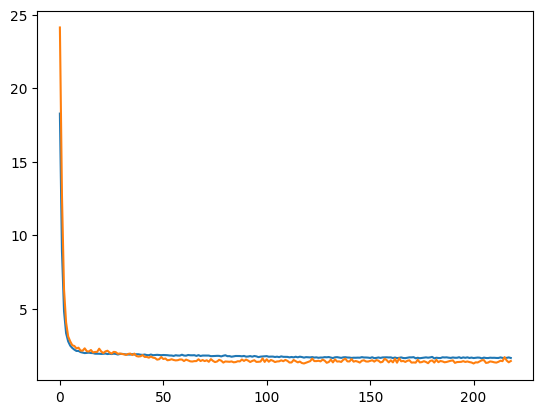

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.4059)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-2.3909)


In [21]:
print(vi.h_min_tilde)

-6.162025


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7062290031792421
tensor([-0.5049])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

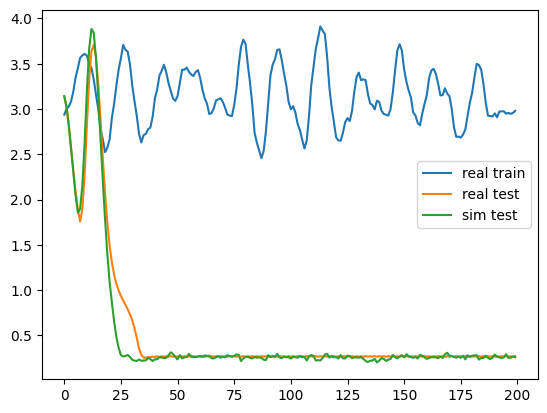

encoder [ 4.125474 -8.      ]
initial_belief tensor([ 3.9585, -3.5526])
real train tensor([ 4.1134, -8.0020])
real test tensor([ 4.2144, -8.0005])
sim tensor([ 4.1313, -7.9995])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


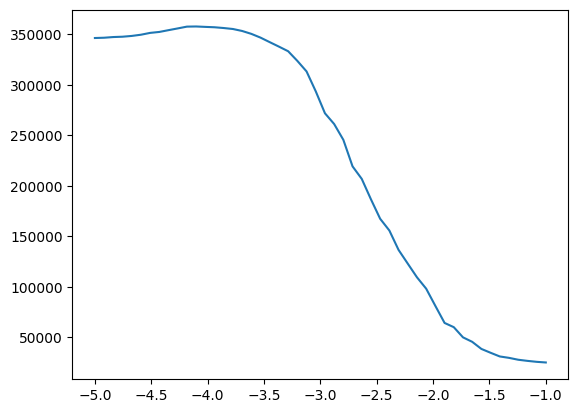

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.42198360572459054
tensor([1.8478])
